In [203]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker as tick
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
%matplotlib inline

# INWARD REMITTANCES (receiving, incoming)

In [175]:
inrem = pd.read_excel('data/inward_remit.xlsx')

In [214]:
inrem = inrem[:216]
inrem = inrem[:216]
inrem = inrem.dropna(how='all')
inrem0 = inrem.replace(np.nan, 0)
inrem0 = inrem0.rename(columns={"Migrant remittance inflows (US$ million)": "Inflow Country", "Remittances as a share of GDP in 2021e (%)": "remit_gdp"}).set_index('Inflow Country').replace(' ', np.nan)
# rename country column, rename %GDP column, set country column as index, replace empty value with Nan
inrem0['total_rem'] = inrem0.sum(axis=1)
# add column for aggregate remittances
inrem0.insert(42, 'pct_gdp', value=((1*inrem0['remit_gdp']).astype(str) + "%"))
# add column for percent gdp, converted to percent
colors=['salmon','blue','yellow','magenta','mediumspringgreen','powderblue','blueviolet','goldenrod','crimson']

# (GLOBAL) Countries RECEIVING the most remittances

### Top 10 Remittance Receiving Countries: 
### India, China, Mexico, Philippines, France, Egypt, Nigeria, Germany, Pakistan, Bangladesh

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/2120383979.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


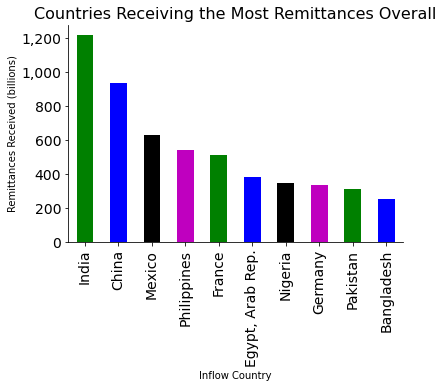

In [177]:
plt.axes(xlabel='Country', ylabel='Remittances Received (billions)')
plt.rc('font', size=14)
plt.title('Countries Receiving the Most Remittances Overall', fontsize=16)
inrem0.sort_values('total_rem', ascending=False).total_rem[2:12].plot(kind='bar', color=['g','b','k','m'], fontsize=14)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.ticklabel_format(style='plain', axis='y')
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### Top RECEIVERS (1-5, 6-10, 11-15)

In [211]:
inrem_countries = inrem0.sort_values('total_rem', ascending=False)[2:]
inrem_countries = inrem_countries.drop('remit_gdp', axis=1).drop('total_rem', axis=1).drop('pct_gdp', axis=1)
inrem_countries

1980         1981         1982         1983  \
Inflow Country                                                         
India             2761.280685  2301.890115  2621.913836  2662.479622   
China                0.000000     0.000000   616.000000   542.000000   
Mexico            1039.000000  1220.000000  1226.000000  1391.000000   
Philippines        626.000000   800.000000  1049.000000  1124.000000   
France            1441.000000  1279.000000  1342.000000  1279.000000   
...                       ...          ...          ...          ...   
Korea, Dem. Rep.     0.000000     0.000000     0.000000     0.000000   
Monaco               0.000000     0.000000     0.000000     0.000000   
Cuba                 0.000000     0.000000     0.000000     0.000000   
Isle of Man          0.000000     0.000000     0.000000     0.000000   
Channel Islands      0.000000     0.000000     0.000000     0.000000   

                         1984         1985        1986         1987  \
Inflow Country                                                        
India             2293.065837  2472.285487  2243.01388  2663.469748   
China              403.000000   271.000000   407.00000   166.000000   
Mexico            1564.000000  1619.000000  1771.00000  1987.000000   
Philippines        718.000000   806.000000   861.00000  1020.000000   
France            1262.000000  1391.000000  2022.00000  2469.000000   
...                       ...          ...         ...          ...   
Korea, Dem. Rep.     0.000000     0.000000     0.00000     0.000000   
Monaco               0.000000     0.000000     0.00000     0.000000   
Cuba                 0.000000     0.000000     0.00000     0.000000   
Isle of Man          0.000000     0.000000     0.00000     0.000000   
Channel Islands      0.000000     0.000000     0.00000     0.000000   

                         1988         1989  ...          2012          2013  \
Inflow Country                              ...                               
India             2316.724191  2609.857302  ...  68820.517838  69970.360847   
China              129.000000    76.000000  ...  57986.598422  59491.287194   
Mexico            2442.000000  2790.000000  ...  23208.649190  23188.811955   
Philippines       1262.000000  1360.000000  ...  24609.679613  26716.840269   
France            3424.000000  3221.000000  ...  22666.366759  24412.282153   
...                       ...          ...  ...           ...           ...   
Korea, Dem. Rep.     0.000000     0.000000  ...      0.000000      0.000000   
Monaco               0.000000     0.000000  ...      0.000000      0.000000   
Cuba                 0.000000     0.000000  ...      0.000000      0.000000   
Isle of Man          0.000000     0.000000  ...      0.000000      0.000000   
Channel Islands      0.000000     0.000000  ...      0.000000      0.000000   

                          2014          2015          2016          2017  \
Inflow Country                                                             
India             70388.642797  68909.693353  62744.364090  68967.175500   
China             62332.342308  63937.646592  60999.999488  63875.674112   
Mexico            24802.081325  26233.171803  28690.957406  32270.507679   
Philippines       28690.797896  29799.395700  31141.973475  32809.770434   
France            25358.374728  24066.989837  24042.348847  24884.547856   
...                        ...           ...           ...           ...   
Korea, Dem. Rep.      0.000000      0.000000      0.000000      0.000000   
Monaco                0.000000      0.000000      0.000000      0.000000   
Cuba                  0.000000      0.000000      0.000000      0.000000   
Isle of Man           0.000000      0.000000      0.000000      0.000000   
Channel Islands       0.000000      0.000000      0.000000      0.000000   

                          2018          2019          2020         2021e  
Inflow Country                                                          

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/2684825556.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions


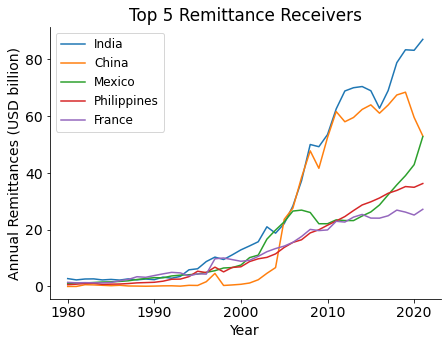

In [215]:
# Formatting
plt.figure(figsize=(7,5))
plt.axes(title='Top 5 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD billion)')
plt.rc('font', size=14)    # overall font
plt.gca().spines[['top', 'right']].set_visible(False)    # remove top and right figure bounds (aesthetic)
plt.ticklabel_format(style='plain', axis='y')    # remove '1e6' (million) multiplier from y-axis

for i in range(5):
    inrem_countries.iloc[i].plot()
    
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions
plt.legend(loc='best', fontsize=12)
plt.show()

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/1952698201.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions


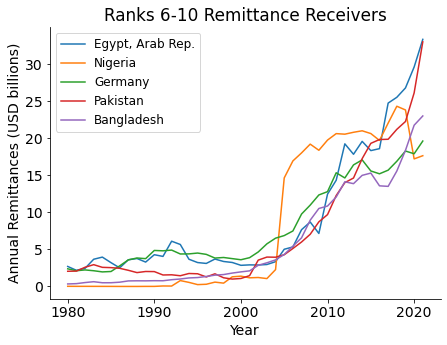

In [217]:
# Top Receivers (#6-10)
plt.figure(figsize=(7,5))
plt.axes(title='Ranks 6-10 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD billions)')
plt.rc('font', size=14)   
plt.gca().spines[['top', 'right']].set_visible(False)

plt.ticklabel_format(style='plain', axis='y')
for i in range(5,10):
    inrem_countries.iloc[i].plot()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions
plt.legend(loc='best', fontsize=12)

In [220]:
# Top Senders (#11-15)
plt.figure(figsize=(7,5))
plt.axes(title='Ranks 11-15 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD billions)')
plt.rc('font', size=14)   
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ticklabel_format(style='plain', axis='y')

for i in range(10, 15):
    inrem_countries.iloc[i].plot()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=12)
plt.close()

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/1936985037.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


# Top Receivers 2020

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/3799064552.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


2020
Inflow Country                  
Mexico              42878.274907
Philippines         34913.342999
Egypt, Arab Rep.    29602.900000
Pakistan            26108.000000
France              25141.879667
Bangladesh          21749.701161
Germany             17898.798739
Nigeria             17207.547306
Vietnam             17200.000000
Ukraine             15213.000000
Belgium             12693.508977
Guatemala           11405.439200
Russian Federation   9914.970000
Italy                9711.242183
Indonesia            9650.926142

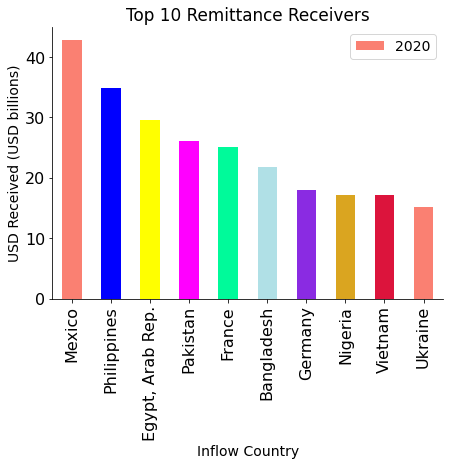

In [258]:
top2020 = in_global.sort_values(2020, ascending=False).set_index('Inflow Country')[2:]


plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
top2020[2020][:10].plot(kind='bar', ylabel='USD Received (USD billions)', title='Top 10 Remittance Receivers', fontsize=16, color=colors)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend()

pd.DataFrame(top2020[2020]).head(15)


# Percent of GDP from Remittances (top 10)

In [189]:
top_gdp = inrem0.sort_values('remit_gdp', ascending=False)
top_gdp = pd.DataFrame(top_gdp['remit_gdp'])

<Figure size 504x360 with 0 Axes>

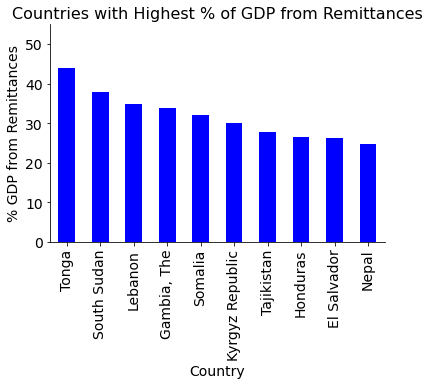

In [196]:
plt.figure(figsize=(7,5))
top_gdp[:10].plot(kind='bar', fontsize=14, ylim=(0,55), color=['b','b','k','m'], xlabel='Country', ylabel='% GDP from Remittances', legend=False)

plt.title('Countries with Highest % of GDP from Remittances', fontsize=16)
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.rc('font', size=14)  

plt.show()

# Regional Remittance INFLOWS Analysis

In [269]:
import geonamescache
import ast
gc = geonamescache.GeonamesCache()
countries = pd.DataFrame(gc.get_countries()).T
continents = pd.DataFrame(gc.get_continents()).T

In [270]:
continents = continents.rename(columns={'continentCode': 'continentcode'})
# cleaning up imported column to merge on so it matches
mapp = pd.merge(countries, continents, on='continentcode', how='left')
# mapping countries onto continents dictionary
mapp = mapp.rename(columns={'name_x': 'Inflow Country'})
# renaming to match col in next merge
mapp2 = mapp[['Inflow Country', 'continentcode', 'capital', 'population_x', 'currencycode', 'languages', 'geonameid']]
# selecting data columns from mapp I want in order to map continent codes (& other data) onto WB dataset
in_global = inrem0.merge(mapp2, on='Inflow Country', how='left')

#### Isolating countries with null continent codes to match them

In [271]:
null_cont = in_global[['Inflow Country', 'continentcode']]
null_cont.continentcode.isna().describe()
# 35 uncategorized countries
null_cont['null'] = null_cont['continentcode'].isna()
null_cont = null_cont.sort_values('null', ascending=False)[1:35]
# creating df to identify countries with null continentcode. will update their values in broader df

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/1046373033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_cont['null'] = null_cont['continentcode'].isna()


In [272]:
null_cont.index
in_global.at[105, 'continentcode'] = 'AS'
in_global.at[128, 'continentcode'] = 'OC'
in_global.at[211, 'continentcode'] = 'AS'
in_global.at[13, 'continentcode'] = 'CB'
in_global.at[210, 'continentcode'] = 'AS'
in_global.at[209, 'continentcode'] = 'CB'
in_global.at[102, 'continentcode'] = 'AS'
in_global.at[101, 'continentcode'] = 'AS'
in_global.at[106, 'continentcode'] = 'AS'
in_global.at[207, 'continentcode'] = 'SA'
in_global.at[70, 'continentcode'] = 'AF'
in_global.at[190, 'continentcode'] = 'AS'
in_global.at[158, 'continentcode'] = 'EU'
in_global.at[64, 'continentcode'] = 'EU'
in_global.at[62, 'continentcode'] = 'AF'
in_global.at[57, 'continentcode'] = 'AF'
in_global.at[169, 'continentcode'] = 'CB'
in_global.at[170, 'continentcode'] = 'EU'
in_global.at[84, 'continentcode'] = 'AS'
in_global.at[142, 'continentcode'] = 'EU'
in_global.at[46, 'continentcode'] = 'AF'
in_global.at[89, 'continentcode'] = 'AS'
in_global.at[44, 'continentcode'] = 'AF'
in_global.at[43, 'continentcode'] = 'AF'
in_global.at[178, 'continentcode'] = 'CB'
in_global.at[179, 'continentcode'] = 'CB'
in_global.at[180, 'continentcode'] = 'CB'
in_global.at[181, 'continentcode'] = 'CB'
in_global.at[38, 'continentcode'] = 'EU'
in_global.at[186, 'continentcode'] = 'AS'
in_global.at[31, 'continentcode'] = 'AF'
in_global.at[27, 'continentcode'] = 'AS'

continent_dict = {
    'AS': 'Asia',
    'AF': 'Africa',
    'SA': 'South America',
    'NA': 'North America',
    'EU': 'Europe',
    'OC': 'Oceania',
    'CB': 'Caribbean'
}
in_global['continent'] = in_global.continentcode.map(continent_dict)
in_global.continent.isna().describe()    # 2 with null continent ('World', 'LICs')

# Creating regional lists
EUCA = 'Albania; Armenia; Azerbaijan; Belarus; Bosnia and Herzegovina; Bulgaria; Croatia; Georgia; Kazakhstan; Kyrgyzstan; Montenegro; Republic of Moldova; Romania; Russian Federation; Serbia; Tajikistan; Macedonia; Turkey; Turkmenistan; Ukraine; Uzbekistan'
EUCA = EUCA.replace(';', ',')
EUCA = EUCA.split(', ')

EAP = 'Australia; Brunei Darussalam; Cambodia; China; Cook Islands; Democratic People’s Republic of Korea; Fiji; Indonesia; Japan; Kiribati; Lao People’s Democratic Republic; Malaysia; Marshall Islands; Micronesia; Mongolia; Myanmar; Nauru; New Zealand; Niue; Palau; Papua New Guinea; Philippines; Republic of Korea; Samoa; Singapore; Solomon Islands; Thailand; Timor-Leste; Tokelau ; Tonga; Tuvalu; Vanuatu; Vietnam'
EAP = EAP.replace(';', ',')
EAP = EAP.split(', ')

SAS = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

WEU = 'Andorra; Austria; Belgium; Cyprus; Czechia; Denmark; Estonia; Finland; France; Germany; Greece; Holy See; Hungary; Iceland; Ireland; Italy; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Netherlands; Norway; Poland; Portugal; San Marino; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom'
WEU = WEU.replace(';', ',')
WEU = WEU.split(', ')

LAC = 'Anguilla; Antigua and Barbuda; Argentina; Bahamas; Barbados; Belize; Bolivia; Brazil; British Virgin Islands; Chile; Colombia; Costa Rica; Cuba; Dominica; Dominican Republic; Ecuador; El Salvador; Grenada; Guatemala; Guyana; Haiti; Honduras; Jamaica; Mexico; Montserrat; Nicaragua; Panama; Paraguay; Peru; Saint Kitts and Nevis; Saint Lucia; Saint Vincent and the Grenadines; Suriname; Trinidad and Tobago; Turks and Caicos Islands; Uruguay; Venezuela'
LAC = LAC.replace(';', ',')
LAC = LAC.split(', ')

MENA = 'Algeria; Bahrain; Egypt, Arab Rep.; Iran; Iraq; Israel; Jordan; Kuwait; Lebanon; Libya; Morocco; Oman; Qatar; Saudi Arabia; State of Palestine; Syrian Arab Republic; Tunisia; United Arab Emirates; Yemen'
MENA = MENA.replace(';', ',')
MENA = MENA.split(', ')

NA = ['Canada', 'United States']

ESAF = 'Angola; Botswana; Burundi; Comoros; Djibouti; Eritrea; Ethiopia; Kenya; Lesotho; Madagascar; Malawi; Mauritius; Mozambique; Namibia; Rwanda; Seychelles; Somalia; South Africa; South Sudan; Sudan; Swaziland; Uganda; United Republic of Tanzania; Zambia; Zimbabwe'
ESAF = ESAF.replace(';', ',')
ESAF = ESAF.split(', ')

WCAF = 'Benin; Burkina Faso; Cabo Verde; Cameroon; Central African Republic; Chad; Congo; Côte d’Ivoire; Democratic Republic of the Congo; Equatorial Guinea; Gabon; Gambia; Ghana; Guinea; Guinea-Bissau; Liberia; Mali; Mauritania; Niger; Nigeria; Sao Tome and Principe; Senegal; Sierra Leone; Togo'
WCAF = WCAF.replace(';', ',')
WCAF = WCAF.split(', ')

reg_list = ['EUCA', 'EAP', 'SAS', 'WEU', 'LAC', 'MENA', 'NA', 'ESAF', 'WCAF']

# With these lists... create new column to identify region
in_global.shape
in_global.insert(52, 'region', np.nan)

In [273]:
# Assigning each country to a region based on list fron UNICEF.
for index in range(in_global.shape[0]):
    if in_global.loc[index, 'Inflow Country'] in EUCA:
        in_global.loc[index, 'region'] = 'EUCA'
    elif in_global.loc[index, 'Inflow Country'] in EAP:
        in_global.loc[index, 'region'] = 'EAP'
    elif in_global.loc[index, 'Inflow Country'] in SAS:
        in_global.loc[index, 'region'] = 'SAS'
    elif in_global.loc[index, 'Inflow Country'] in WEU:
        in_global.loc[index, 'region'] = 'WEU'
    elif in_global.loc[index, 'Inflow Country'] in LAC:
        in_global.loc[index, 'region'] = 'LAC'
    elif in_global.loc[index, 'Inflow Country'] in MENA:
        in_global.loc[index, 'region'] = 'MENA'
    elif in_global.loc[index, 'Inflow Country'] in NA:
        in_global.loc[index, 'region'] = 'NA'
    elif in_global.loc[index, 'Inflow Country'] in ESAF:
        in_global.loc[index, 'region'] = 'ESAF'
    elif in_global.loc[index, 'Inflow Country'] in WCAF:
        in_global.loc[index, 'region'] = 'WCAF'
    else: pass

In [274]:
# Identify and classify countries with null regions
null_reg = in_global[in_global.region.isna()]
null_reg
in_global.at[3, 'region'] = 'EAP'
in_global.at[9, 'region'] = 'LAC'
in_global.at[13, 'region'] = 'LAC'
in_global.at[21, 'region'] = 'LAC'
in_global.at[35, 'region'] = 'LAC'
in_global.at[38, 'region'] = 'WEU'
in_global.at[43, 'region'] = 'WCAF'
in_global.at[44, 'region'] = 'WCAF'
in_global.at[46, 'region'] = 'WCAF'
in_global.at[49, 'region'] = 'LAC'
in_global.at[51, 'region'] = 'WEU'
in_global.at[57, 'region'] = 'MENA'
in_global.at[62, 'region'] = 'ESAF'
in_global.at[64, 'region'] = 'WEU'
in_global.at[68, 'region'] = 'EAP'
in_global.at[70, 'region'] = 'WCAF'
in_global.at[77, 'region'] = 'EAP'
in_global.at[84, 'region'] = 'EAP'
in_global.at[89, 'region'] = 'MENA'
in_global.at[102, 'region'] = 'EAP'
in_global.at[103, 'region'] = 'EUCA'
in_global.at[105, 'region'] = 'EUCA'
in_global.at[106, 'region'] = 'EAP'
in_global.at[115, 'region'] = 'EAP'
in_global.at[126, 'region'] = 'EAP'
in_global.at[127, 'region'] = 'EUCA'
in_global.at[137, 'region'] = 'EAP'
in_global.at[142, 'region'] = 'EUCA'
in_global.at[169, 'region'] = 'LAC'
in_global.at[170, 'region'] = 'WEU'
in_global.at[178, 'region'] = 'LAC'
in_global.at[179, 'region'] = 'LAC'
in_global.at[180, 'region'] = 'LAC'
in_global.at[181, 'region'] = 'LAC'
in_global.at[188, 'region'] = 'ESAF'
in_global.at[207, 'region'] = 'LAC'
in_global.at[209, 'region'] = 'LAC'
in_global.at[210, 'region'] = 'MENA'
in_global.at[211, 'region'] = 'MENA'

in_global = in_global[in_global['region'].notna()]

In [275]:
in_global.shape
in_global.dtypes
pd.to_numeric(in_global.columns.values[1:41])
in_global = in_global.set_index('Inflow Country')

## Total Remittances Received by Continent

In [276]:
cont = in_global.groupby('continentcode').sum()
pd.DataFrame(cont.sort_values('total_rem', ascending=False)['total_rem']).rename({'total_rem':'Total Remittances Received (USD trillions)'},axis=1)

Total Remittances Received (USD trillions)
continentcode                                            
AS                                           5.081761e+06
EU                                           3.244867e+06
NA                                           1.373679e+06
AF                                           1.294437e+06
SA                                           3.574540e+05
OC                                           1.190649e+05
CB                                           3.218338e+03

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/4089417694.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


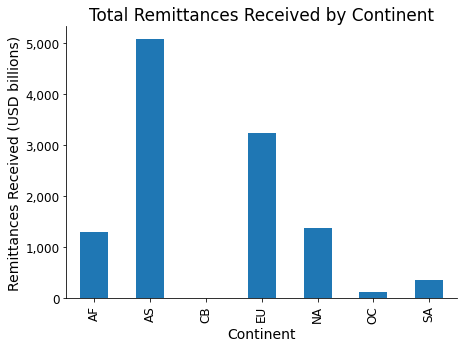

In [277]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

cont.total_rem.plot(kind='bar', title='Total Remittances Received by Continent', xlabel='Continent', ylabel='Remittances Received (USD billions)', fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

## Total Remittances Received by Region
- Eastern Eu & Central Asia (ECA) | East Asia & Pacific (EAP) | South Asia (SAS) |
- Western Eu (WEU) | Latin Am & Caribbean (LAC) | Middle East & North Af (MENA) | North Am (NA) |
- Eastern & Southern Africa (ESAF) | West & Central Af (WCAF)
#### Source: UNICEF regional classifications (https://data.unicef.org/regionalclassifications/)

In [278]:
regions = in_global.groupby('region').sum()

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/4012187454.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


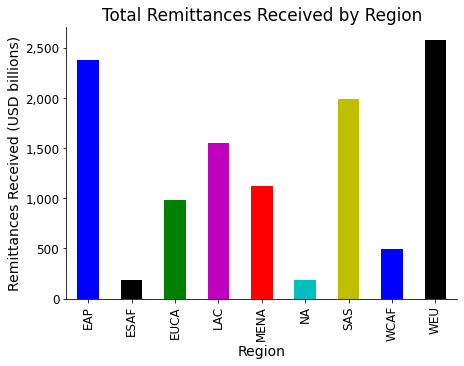

In [279]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

regions.total_rem.plot(kind='bar', title='Total Remittances Received by Region', xlabel='Region', ylabel='Remittances Received (USD billions)', fontsize=12, color=['b','k','g','m','r','c','y'])

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

In [280]:
plt.subplot(1,2,1)

plt.subplot(1,2,2)


/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/2643367947.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


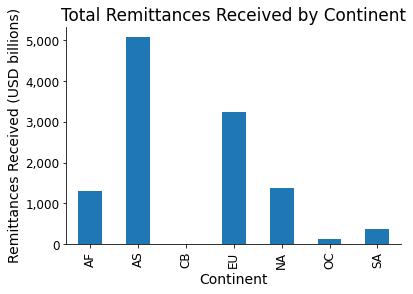

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/2643367947.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


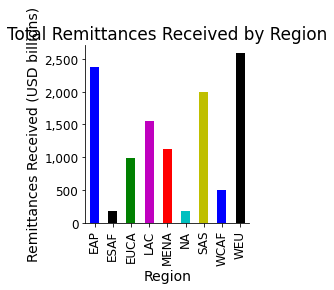

In [361]:
plt.plot(1,2)
plt.rc('font', size=14)    
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')
cont.total_rem.plot(kind='bar', title='Total Remittances Received by Continent', xlabel='Continent', ylabel='Remittances Received (USD billions)', fontsize=12)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

plt.subplot(1,2,2)
plt.rc('font', size=14)    
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')
regions.total_rem.plot(kind='bar', title='Total Remittances Received by Region', xlabel='Region', ylabel='Remittances Received (USD billions)', fontsize=12, color=['b','k','g','m','r','c','y'])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])

plt.tight_layout()
plt.show()




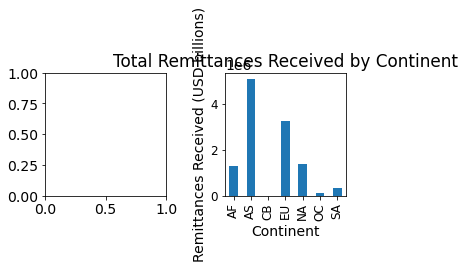

In [364]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0] = cont.total_rem.plot(kind='bar', title='Total Remittances Received by Continent', xlabel='Continent', ylabel='Remittances Received (USD billions)', fontsize=12)
axes[1] = cont.total_rem.plot(kind='bar', title='Total Remittances Received by Continent', xlabel='Continent', ylabel='Remittances Received (USD billions)', fontsize=12)
fig.tight_layout()

## Remittances Received over Time

In [281]:
regionss = regions.drop('remit_gdp', axis=1).drop('total_rem', axis=1)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/3458569915.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


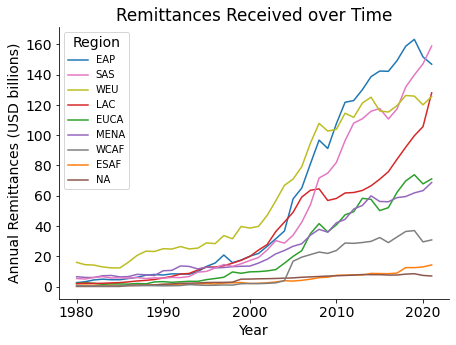

In [282]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(9):
    regionss.iloc[i].plot(title='Remittances Received over Time', xlabel='Year', ylabel='Annual Remittances (USD billions)')

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])

handles, labels = plt.gca().get_legend_handles_labels()    # to reorder legend labels
order = [0,-3,-1,3,2,4,-2,1,-4]    # specify order
# pass labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Region', loc='best', fontsize=10)
plt.show()

### Ukraine probe

In [260]:
inrem0.drop(['remit_gdp', 'total_rem', 'pct_gdp'], axis=1).iloc[200].plot()
inrem0.xs('Ukraine')[2020]
plt.close('all')    # close fig

# Asia Analysis

In [284]:
asia = in_global.loc[in_global.continentcode == 'AS']
asia = asia.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/3130275466.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


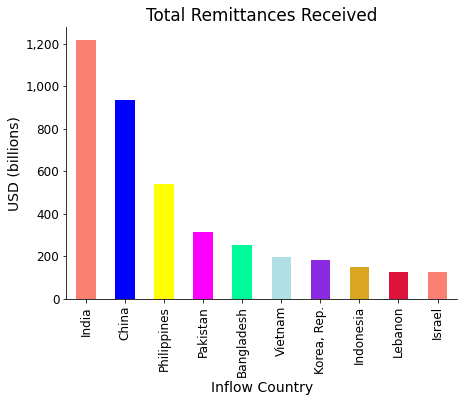

In [286]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
asia.total_rem[:10].plot(kind='bar', color=colors, title='Total Remittances Received', ylabel='USD (billions)', fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

## Trends over Time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/3015819980.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


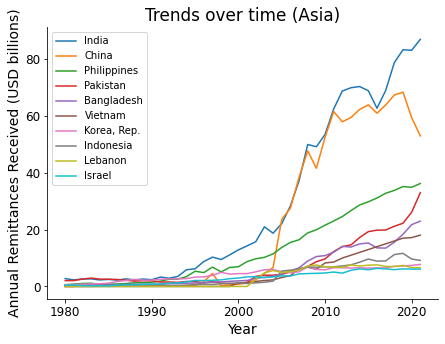

In [289]:
asiaa = asia.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (Asia)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    asiaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## East Asia & the Pacific Analysis

In [290]:
eap = in_global.loc[in_global.region == 'EAP']
eap = eap.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/3213456688.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


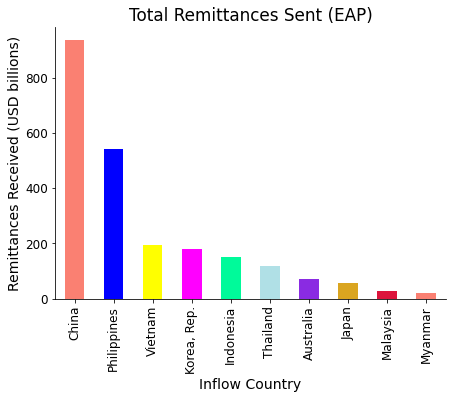

In [294]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14) 
eap.total_rem[:10].plot(kind='bar', title='Total Remittances Sent (EAP)', ylabel='Remittances Received (USD billions)', fontsize=12, color=colors)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### EAP Trends over Time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/4284130395.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


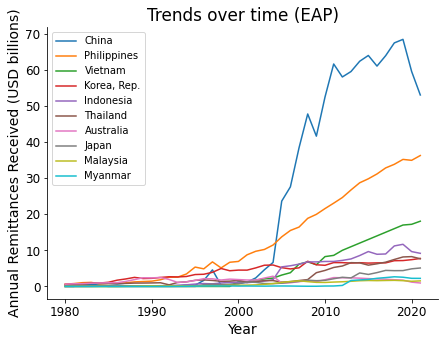

In [297]:
eapp = eap.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (EAP)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    eapp.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## South Asia Analysis

In [298]:
sas = in_global.loc[in_global.region == 'SAS']
sas = sas.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/3062283161.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


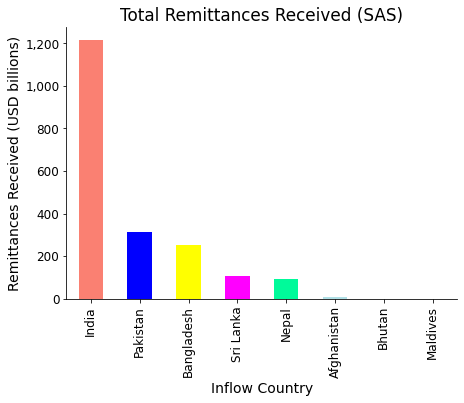

In [315]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14) 
sas.total_rem[:10].plot(kind='bar', title='Total Remittances Received (SAS)', ylabel='Remittances Received (USD billions)', fontsize=12, color=colors)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### SAS Trends over time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/1244387317.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


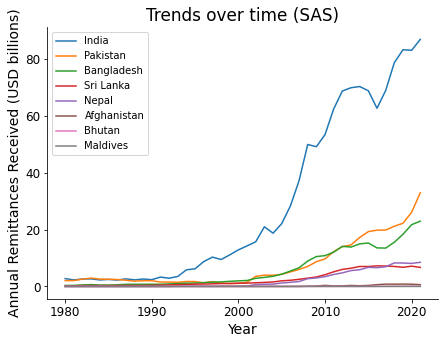

In [302]:
sass = sas.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (SAS)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(len(SAS)):
    sass.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## Middle East & North Africa Analysis

In [304]:
mena = in_global.loc[in_global.region == 'MENA']
mena = mena.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/2121014900.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


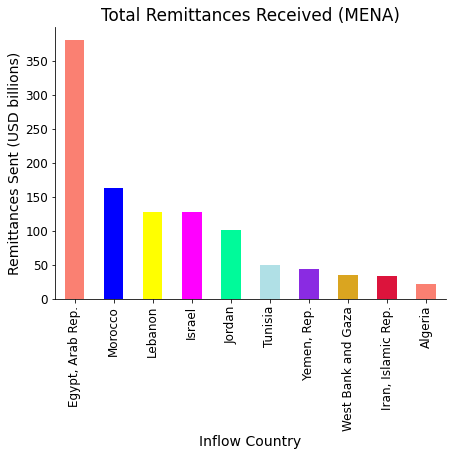

In [305]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
mena.total_rem[:10].plot(kind='bar', title='Total Remittances Received (MENA)', ylabel='Remittances Sent (USD billions)', color=colors, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### MENA Trends over Time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/4280755982.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


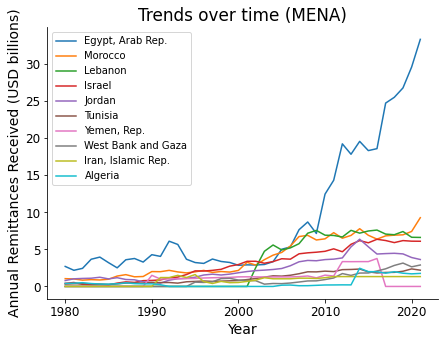

In [309]:
menaa = mena.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (MENA)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    menaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## Eastern Europe & Central Asia Analysis

In [310]:
euca = in_global.loc[in_global.region == 'EUCA']
euca = euca.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/3217467006.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


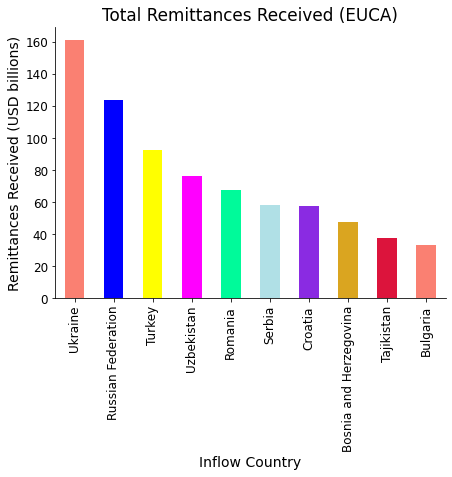

In [314]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
euca.total_rem[:10].plot(kind='bar', title='Total Remittances Received (EUCA)', ylabel='Remittances Received (USD billions)', color=colors, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### EUCA Trends over time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/730051698.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


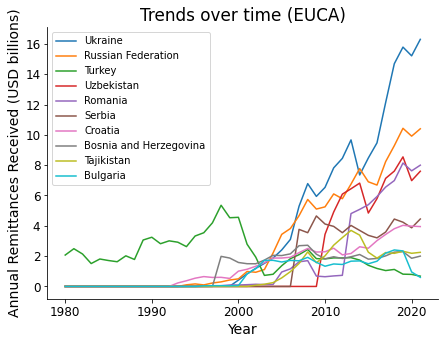

In [316]:
eucaa = euca.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (EUCA)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    eucaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

In [317]:
plt.close('all')
# overlap between senders and receivers
# what are the top migrant groups in SEDING countries

## Latin America & Caribbean

In [318]:
lac = in_global.loc[in_global.region == 'LAC']
lac = lac.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/141702907.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


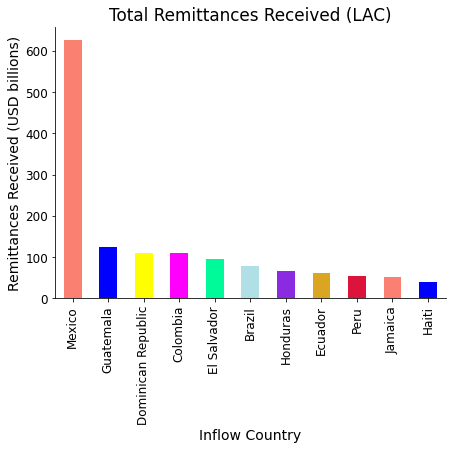

In [326]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
lac.total_rem[:11].plot(kind='bar', color=colors, title='Total Remittances Received (LAC)', ylabel='Remittances Received (USD billions)', fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### LAC Trends over time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/1632443053.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


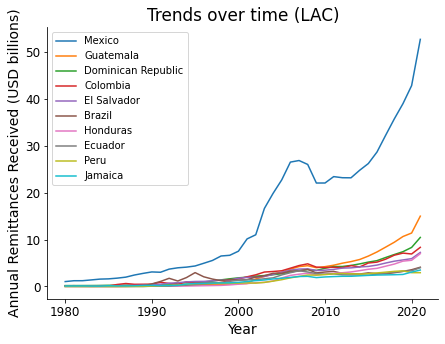

In [327]:
lacc = lac.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (LAC)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    lacc.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## Africa Analysis

In [328]:
africa = in_global.loc[in_global.continentcode == 'AF']
africa = africa.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/1638739547.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


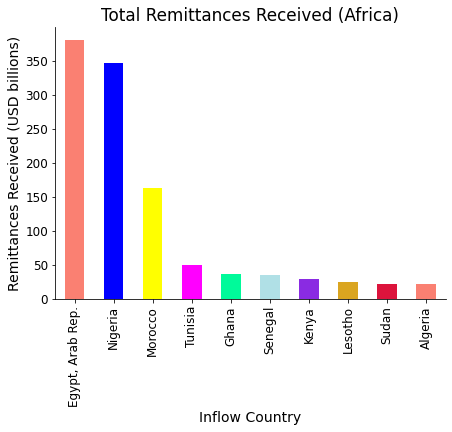

In [329]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
africa.total_rem[:10].plot(kind='bar', color=colors, title='Total Remittances Received (Africa)', ylabel='Remittances Received (USD billions)', fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### Africa Trends over time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/2584971811.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


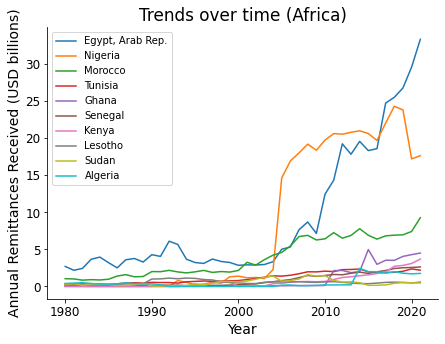

In [324]:
africaa = africa.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (Africa)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    africaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## West & Central Africa Analysis

In [331]:
wcaf = in_global.loc[in_global.region == 'WCAF']
wcaf = wcaf.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/910277359.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


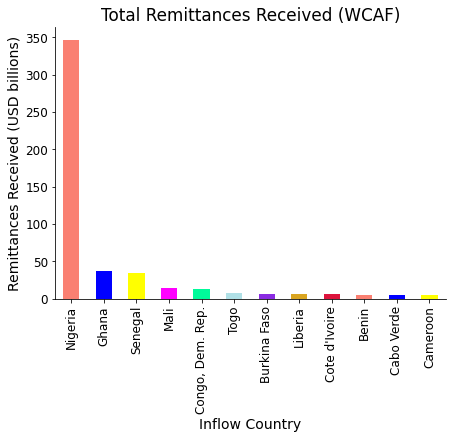

In [334]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)
wcaf.total_rem[:12].plot(kind='bar', title='Total Remittances Received (WCAF)', ylabel='Remittances Received (USD billions)', color=colors, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### WCAF Trends over time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/797875498.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


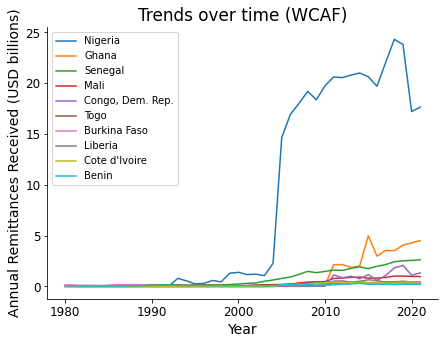

In [335]:
wcaff = wcaf.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (WCAF)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    wcaff.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## East & Southern Africa Analysis

In [336]:
esaf = in_global.loc[in_global.region == 'ESAF']
esaf = esaf.sort_values('total_rem', ascending=False)

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/2406490913.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


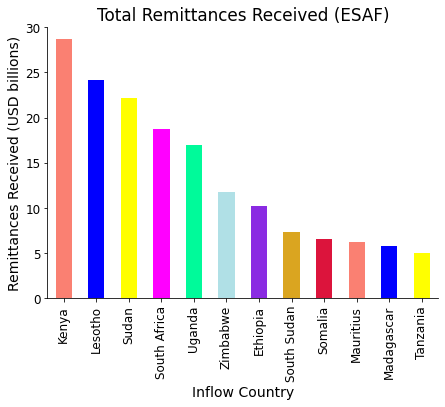

In [338]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)
esaf.total_rem[:12].plot(kind='bar', title='Total Remittances Received (ESAF)', ylabel='Remittances Received (USD billions)', color=colors, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### ESAF Trends over time

/var/folders/wq/t7rcncjj6s956tl_y8_y18080000gn/T/ipykernel_10002/1754149688.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])


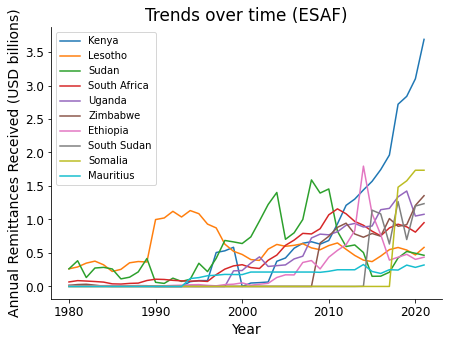

In [343]:
esaff = esaf.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (ESAF)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    esaff.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [8]:
import geopandas as gpd